In [1]:
import numpy as np
import numpy.random as random
import scipy as sp
import pandas as pd
from pandas import Series,DataFrame

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import sklearn
%matplotlib inline
%precision 3

'%.3f'

In [3]:
import requests,zipfile
import io
url='http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'
res=requests.get(url).content
auto=pd.read_csv(io.StringIO(res.decode('utf-8')),header=None)
auto.columns=['symboling','normalized-losses','make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location','wheel-base','length','width','height','curb-weight','engine-type','num-of-cylinders','enzine-size','fuel-system','bore','stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price']

In [ ]:
auto.shape

(205, 26)

In [ ]:
auto.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [6]:
auto=auto[['price','horsepower','width','height']]
auto.isin(['?']).sum()

price         4
horsepower    2
width         0
height        0
dtype: int64

In [7]:
auto=auto.replace('?',np.nan).dropna()
auto.shape

(199, 4)

In [ ]:
auto.dtypes

price          object
horsepower     object
width         float64
height        float64
dtype: object

In [ ]:
auto=auto.assign(price=pd.to_numeric(auto.price))
auto=auto.assign(horsepower=pd.to_numeric(auto.horsepower))
auto.dtypes

price           int64
horsepower      int64
width         float64
height        float64
dtype: object

In [ ]:
auto.corr()

,width,height
width,1.000000,0.309223
height,0.309223,1.000000


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X=auto.drop('price',axis=1)
y=auto['price']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.5,random_state=0)
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
model.score(X_train,y_train)

0.733

In [ ]:
model.score(X_test,y_test)

0.737

In [ ]:
pd.Series(model.coef_,index=X.columns)

horsepower      81.651078
width         1829.174506
height         229.510077
dtype: float64

In [ ]:
model.intercept_

-128409.046

In [ ]:
url='http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
res=requests.get(url).content
adult=pd.read_csv(io.StringIO(res.decode('utf-8')),header=None)
adult.columns=['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','natice-county','flg-50K']

In [ ]:
adult.shape

(32561, 15)

In [ ]:
adult.isnull().sum().sum()

0

In [ ]:
auto.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,natice-county,flg-50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
adult.groupby('flg-50K').size()

flg-50K
 <=50K    24720
 >50K      7841
dtype: int64

In [ ]:
adult['fin_flg']=adult['flg-50K'].map(lambda x:1 if x==' >50K' else 0)
adult.groupby('fin_flg').size()

fin_flg
0    24720
1     7841
dtype: int64

In [ ]:
from sklearn.linear_model import  LogisticRegression
from sklearn.model_selection import  train_test_split
X=adult[['age','fnlwgt','education-num','capital-gain','capital-loss']]
y=adult['fin_flg']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.5,random_state=0)
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
model.score(X_train,y_train)

0.198

In [ ]:
model.score(X_test,y_test)

0.211

In [ ]:
model.coef_

array([6.295e-03, 6.406e-08, 4.805e-02, 9.768e-06, 1.246e-04])

In [ ]:
np.exp(model.coef_)

array([1.006, 1.   , 1.049, 1.   , 1.   ])

In [66]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X=adult[['age','fnlwgt','education-num','capital-gain','capital-loss']]
y=adult['fin_flg']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.5,random_state=0)
sc=StandardScaler()
sc.fit(X_train)
X_train_std=sc.transform(X_train)
X_test_std=sc.transform(X_test)
model=LogisticRegression()
model.fit(X_train_std,y_train)

NameError: ignored

In [ ]:
model.score(X_train_std,y_train)

0.811

In [ ]:
model.score(X_test_std,y_test)

0.810

In [ ]:
auto.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,enzine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [43]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
X=auto.drop('price',axis=1)
y=auto['price']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.5,random_state=0)
linear=LinearRegression()
ridge=Ridge(random_state=0)
for model in [linear,ridge]:
    model.fit(X_train,y_train)
    print('{}(train):{:.6f}'.format(model.__class__.__name__,model.score(X_train,y_train)))
    print('{}(train):{:.6f}'.format(model.__class__.__name__,model.score(X_test,y_test)))

LinearRegression(train):0.733358
LinearRegression(train):0.737069
Ridge(train):0.733355
Ridge(train):0.737768


In [44]:
url='http://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data'
res=requests.get(url).content
mushroom=pd.read_csv(io.StringIO(res.decode('utf-8')),header=None)
mushroom.columns=['classes','cap_shape','cap_surface','cap_color','odor','bruises',
                  'gill_attachment','gill_spacing','gill_size','gill_color','stalk_shape',
                  'stalk_root','stalk_surface_above_ring','stalk_surface_below_ring',
                  'stalk_color_above_ring','stalk_color_below_ring','veil_type','veil_color',
                  'ring_number','ring_type','spore_print_color','population','habitat']
mushroom.head()

,classes,cap_shape,cap_surface,cap_color,odor,bruises,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,stalk_root,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [25]:
mushroom.shape

(8124, 23)

In [26]:
mushroom.isnull().sum().sum()

0

In [27]:
mushroom_dummy=pd.get_dummies(mushroom[['gill_color','gill_attachment','odor','cap_color']])
mushroom_dummy.head()

,gill_color_b,gill_color_e,gill_color_g,gill_color_h,gill_color_k,gill_color_n,gill_color_o,gill_color_p,gill_color_r,gill_color_u,gill_color_w,gill_color_y,gill_attachment_a,gill_attachment_f,odor_f,odor_t,cap_color_b,cap_color_c,cap_color_e,cap_color_g,cap_color_n,cap_color_p,cap_color_r,cap_color_u,cap_color_w,cap_color_y
0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0


In [28]:
mushroom_dummy['flg']=mushroom['classes'].map(lambda x:1 if x=='p' else 0)

In [29]:
mushroom_dummy.groupby(['cap_color_c','flg'])['flg'].count().unstack()

flg,0,1
cap_color_c,,
0,4176,3904
1,32,12


In [30]:
mushroom_dummy.groupby(['gill_color_b','flg'])['flg'].count().unstack()

flg,0,1
gill_color_b,,
0,4208.0,2188.0
1,NaN,1728.0


In [31]:
-(0.5*np.log2(0.5)+0.5*np.log2(0.5))

1.000

In [32]:
-(0.001*np.log2(0.001)+0.999*np.log2(0.999))

0.011

In [33]:
def calc_entropy(p):
    return -(p*np.log2(p)+(1-p)*np.log2(1-p))

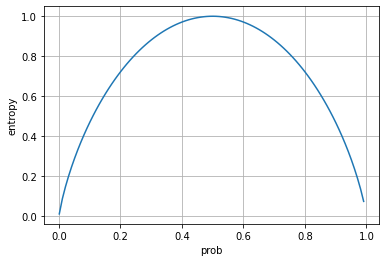

In [34]:
p=np.arange(0.001,0.999,0.01)
plt.plot(p,calc_entropy(p))
plt.xlabel('prob')
plt.ylabel('entropy')
plt.grid(True)

In [35]:
mushroom_dummy.groupby('flg')['flg'].count()

flg
0    4208
1    3916
Name: flg, dtype: int64

In [37]:
entropy_init= -(0.518*np.log2(0.518)+0.482*np.log2(0.482))
entropy_init

0.999

In [40]:
mushroom_dummy.groupby(['cap_color_c','flg'])['flg'].count().unstack()

flg,0,1
cap_color_c,,
0,4176,3904
1,32,12


In [46]:
p1=4176/(4176+3904)
p2=1-p1
entropy_c0= -(p1*np.log2(p1)+p2*np.log2(p2))
entropy_c0

0.999

In [42]:
p1=32/(32+12)
p2=1-p1
entropy_c1= -(p1*np.log2(p1)+p2*np.log2(p2))
entropy_c1

0.845

In [48]:
entropy_after=(4176+3904)/8124*entropy_c0+(32+12)/8124*entropy_c1
entropy_after

0.998

In [49]:
entropy_init-entropy_after

0.001

In [50]:
mushroom_dummy.groupby(['gill_color_b','flg'])['flg'].count().unstack()

flg,0,1
gill_color_b,,
0,4208.0,2188.0
1,NaN,1728.0


In [51]:
p1=4208/(4208+2188)
p2=1-p1
entropy_b0=-(p1*np.log2(p1)+p2*np.log2(p2))
p1=0/(0+1728)
p2=1-p1
entropy_b1=-(p2*np.log2(p2))
entropy_after=(4208+2188)/8124*entropy_b0+(0+1728)/8124*entropy_b1
entropy_init-entropy_after

0.269

In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
X=mushroom_dummy.drop('flg',axis=1)
y=mushroom_dummy['flg']
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)
model=DecisionTreeClassifier(criterion='entropy',max_depth=5,random_state=0)
model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [54]:
model.score(X_train,y_train)

0.883

In [55]:
model.score(X_test,y_test)

0.894

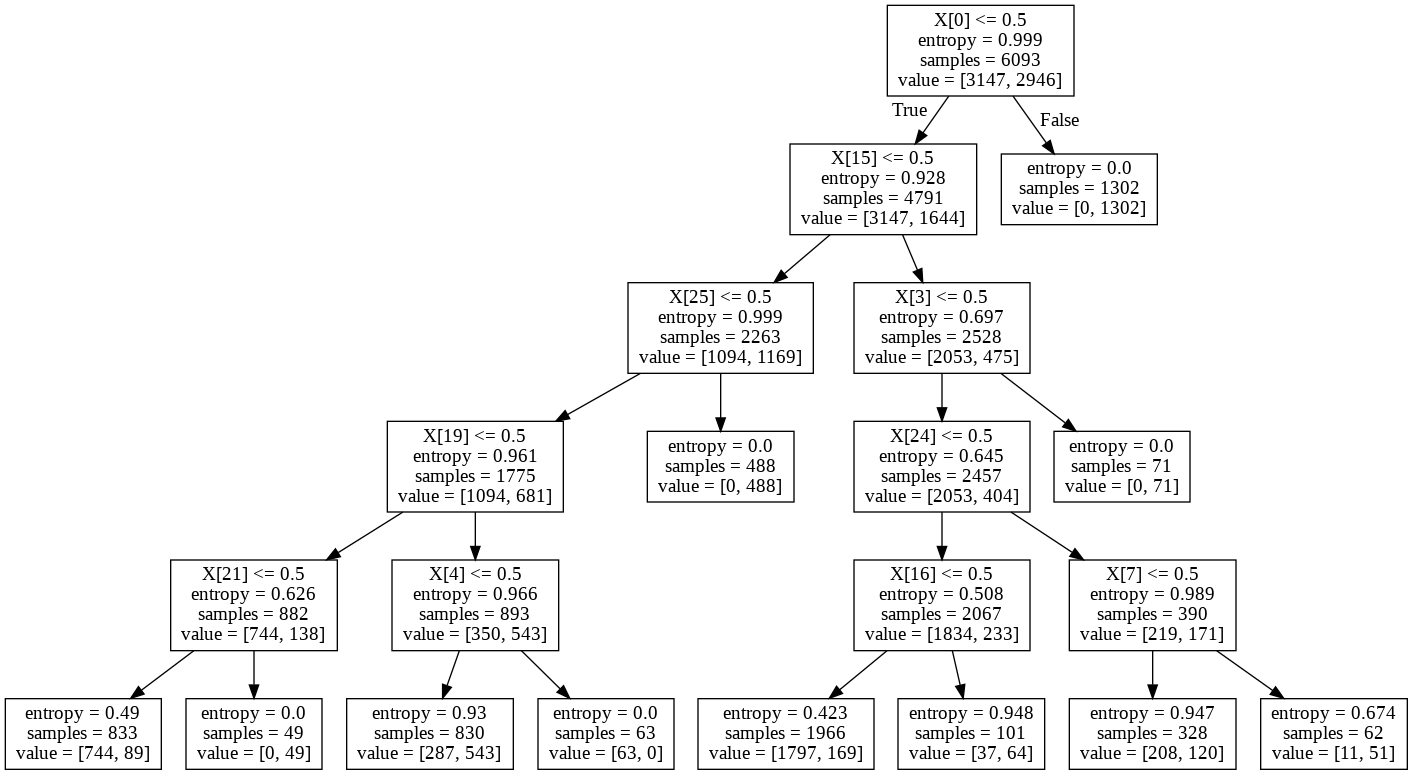

In [56]:
from sklearn import tree
import pydotplus
from sklearn.externals.six import StringIO
from IPython.display import Image
dot_data=StringIO()
tree.export_graphviz(model,out_file=dot_data)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

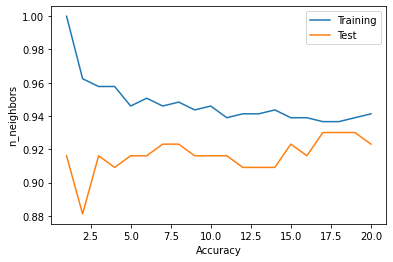

In [57]:
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
cancer=load_breast_cancer()
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=0)
training_accuracy=[]
test_accuracy=[]
for n_neighbors in range(1,21):
    model=KNeighborsClassifier(n_neighbors=n_neighbors)
    model.fit(X_train,y_train)
    training_accuracy.append(model.score(X_train,y_train))
    test_accuracy.append(model.score(X_test,y_test))

plt.plot(range(1,21),training_accuracy,label='Training')
plt.plot(range(1,21),test_accuracy,label='Test')
plt.xlabel('Accuracy')
plt.ylabel('n_neighbors')
plt.legend()

In [61]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
cancer=load_breast_cancer()
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=0)
model=LinearSVC()
model.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [62]:
model.score(X_train,y_train)

0.932

In [63]:
model.score(X_test,y_test)

0.930

In [71]:
cancer=load_breast_cancer()
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=0)
sc=StandardScaler()
sc.fit(X_train)
X_train_std=sc.transform(X_train)
X_test_std=sc.transform(X_test)
model=LinearSVC()
model.fit(X_train_std,y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [74]:
model.score(X_train_std,y_train)

0.993

In [75]:
model.score(X_test_std,y_test)

0.951